## # WE11-Autoencoder



In [2]:
import numpy as np

### Load our dataset

In [3]:
from tensorflow.keras.datasets import mnist


# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


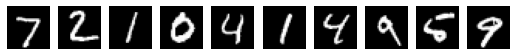

In [4]:
from matplotlib import pyplot as plt

n = 10
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

In [5]:
## Load the  autoencoder

In [6]:
from tensorflow import keras

pretrained_model = keras.models.load_model('initially_trained_autoencoder.h5')

## Test the autoencoder model 
## (Display the predictions)

313/313 [==============================] - 2s 5ms/step


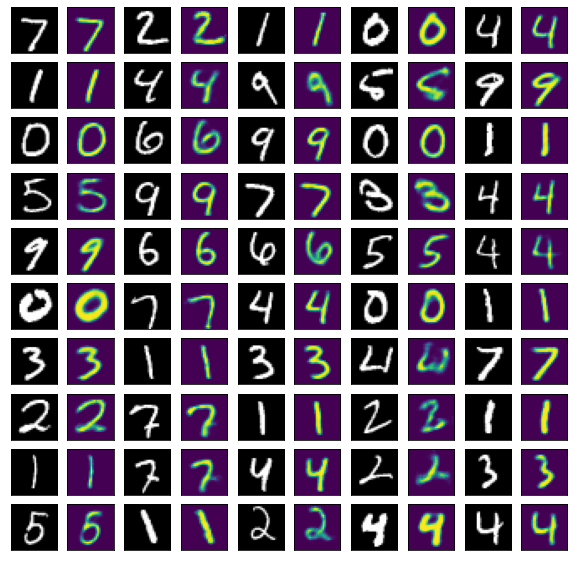

In [8]:
reconstructed_images = pretrained_model.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

## Load new images and test

In [9]:
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image

In [11]:
# load 5 sample images
images = []
for i in range(5):
    img = tf.keras.utils.load_img(f'i{i+1}.png', target_size=(28, 28), color_mode="grayscale")
    images.append(img)

In [13]:
# predict the images from the sample
input_arrs = []
for img in images:
    input_arr = tf.keras.utils.img_to_array(img)
    input_arr = input_arr/255  # normalize between 0 and 1
    input_arr = input_arr.reshape(784)
    input_arrs.append(input_arr)

input_arrs = np.array(input_arrs)  # Convert images to a batch of images

predictions = pretrained_model.predict(input_arrs)
print(predictions.shape)

1/1 [==============================] - 0s 24ms/step
(5, 784)


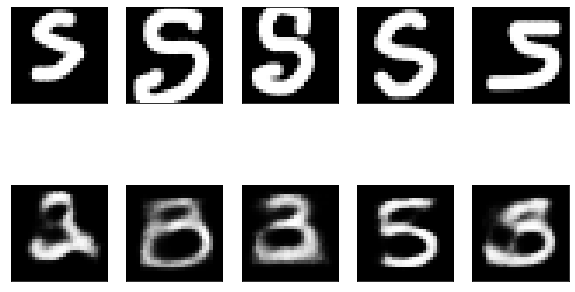

In [14]:
# display the images and their reconstructions side by side
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap="gray")
    
    plt.subplot(2, 5, i+6)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(predictions[i].reshape(28, 28), cmap="gray")

plt.show()

## Oversampling

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    fill_mode='nearest'
)

# Load and oversample images
images = []
for i in range(5):
    img = tf.keras.utils.load_img(f'i{i+1}.png', target_size=(28, 28), color_mode="grayscale")
    x = tf.keras.preprocessing.image.img_to_array(img)
    x = x.reshape((1,) + x.shape)  # Add batch dimension
    # Generate 500 augmented images for each original image
    for batch in datagen.flow(x, batch_size=1):
        images.append(batch[0].astype('uint8'))
        if len(images) % 500 == 0:  # Stop after 500 copies are created
            break

### Train model with new images

In [17]:
from tensorflow.keras.datasets import mnist


# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


In [18]:
# Create bad images and merge with training data
input_arrs = np.array(input_arrs)
bad_images = np.repeat(input_arrs, 27, axis=0)

new_image_set = np.vstack((train_images[:500], bad_images))
np.random.shuffle(new_image_set)

new_images_train = new_image_set[int(len(new_image_set)*.8):]
new_images_test = new_image_set[int(len(new_image_set)*.2):]

# Updated

In [19]:
from tensorflow import keras
new_model = keras.models.load_model('initially_trained_autoencoder.h5')

In [20]:
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training

# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = new_model.fit(
    x=new_images_train, # For autoencoders, both the input and the target are the same
    y=new_images_train, 
    epochs=15, 
    batch_size=128,
    shuffle=True, 
    validation_data=(new_images_test, new_images_test),
    callbacks=[early_stop]
)

Epoch 1/15
1/1 [==============================] - 1s 1s/step - loss: 0.2696 - val_loss: 0.1941
Epoch 2/15
1/1 [==============================] - 0s 88ms/step - loss: 0.2005 - val_loss: 0.1737
Epoch 3/15
1/1 [==============================] - 0s 84ms/step - loss: 0.1755 - val_loss: 0.1722
Epoch 4/15
1/1 [==============================] - 0s 86ms/step - loss: 0.1715 - val_loss: 0.1708
Epoch 5/15
1/1 [==============================] - 0s 88ms/step - loss: 0.1686 - val_loss: 0.1685
Epoch 6/15
1/1 [==============================] - 0s 85ms/step - loss: 0.1650 - val_loss: 0.1609
Epoch 7/15
1/1 [==============================] - 0s 85ms/step - loss: 0.1556 - val_loss: 0.1548
Epoch 8/15
1/1 [==============================] - 0s 104ms/step - loss: 0.1477 - val_loss: 0.1500
Epoch 9/15
1/1 [==============================] - 0s 112ms/step - loss: 0.1410 - val_loss: 0.1430
Epoch 10/15
1/1 [==============================] - 0s 92ms/step - loss: 0.1321 - val_loss: 0.1383
Epoch 11/15
1/1 [============

### Test the model 

313/313 [==============================] - 1s 4ms/step


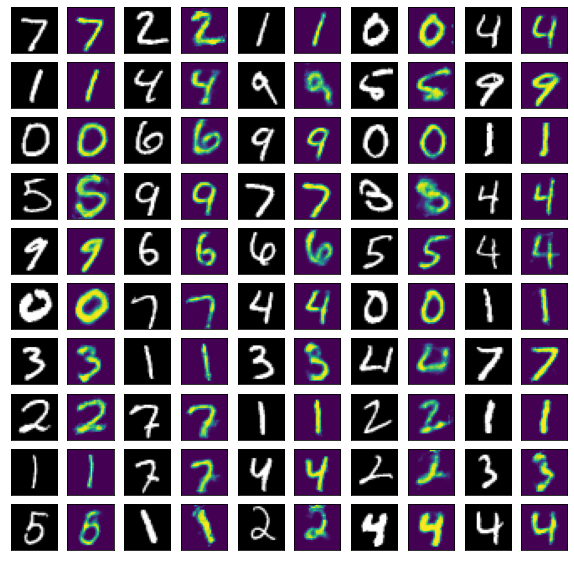

In [21]:
reconstructed_images = new_model.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

### Test the model on the new test set 


In [22]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image

In [23]:
# load 5 sample images
images = []
for i in range(5):
    img_path = f'i{i+1}.png'
    img = tf.keras.utils.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")
    images.append(img)

In [24]:
# predict an image from this sample
input_arrs = []
for img in images:
    input_arr = tf.keras.utils.img_to_array(img)
    input_arr = input_arr/ 255 # normalize between 0 and 1
    input_arr = input_arr.reshape(784)
    input_arrs.append(input_arr)

input_arrs = np.array(input_arrs)
predictions = new_model.predict(input_arrs)
print(predictions.shape)

1/1 [==============================] - 0s 21ms/step
(5, 784)


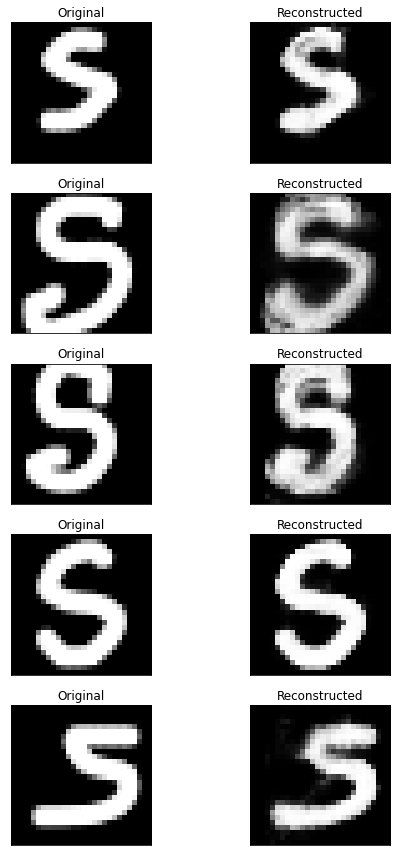

In [25]:
# display the two images side by side
rows = 5
cols = 2
fig, axs = plt.subplots(rows,cols,figsize=(8,12))

for i in range(rows):
    axs[i,0].imshow(images[i], cmap="gray")
    axs[i,0].set_xticks([])
    axs[i,0].set_yticks([])
    axs[i,0].set_title("Original")
    
    axs[i,1].imshow(predictions[i].reshape(28,28), cmap="gray")
    axs[i,1].set_xticks([])
    axs[i,1].set_yticks([])
    axs[i,1].set_title("Reconstructed")

plt.tight_layout()
plt.show()

### Save the autoencoder

In [28]:
new_model.save('trained_autoencoder.h5')

# Analysis

Adding oversampled new images to an updated model improves the accuracy of predictions on both original and new images.The model successfully identifies new characters and reconstructs them accurately.